<a href="https://colab.research.google.com/github/Talha1902/CV_SIGN_LANGAUGE_INTERPRETER/blob/main/GLIGENProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clone** **Github** **Repo**

In [1]:
!git clone https://github.com/gligen/GLIGEN.git

Cloning into 'GLIGEN'...
remote: Enumerating objects: 476, done.
remote: Counting objects: 100% (176/176), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 476 (delta 113), reused 76 (delta 76), pack-reused 300
Receiving objects: 100% (476/476), 20.21 MiB | 21.18 MiB/s, done.
Resolving deltas: 100% (223/223), done.


In [2]:
%cd GLIGEN

/content/GLIGEN


## **Installing** **Required** **Libraries**

In [5]:
!pip uninstall -y transformers diffusers jax jaxlib
!pip install transformers==4.26.1
!pip install diffusers==0.14.0
!pip install torch==1.13.1
!pip install matplotlib
!pip install albumentations==0.4.3 opencv-python pudb==2019.2 imageio==2.9.0 imageio-ffmpeg==0.4.2
!pip install pytorch-lightning==1.4.2 omegaconf==2.1.1 test-tube streamlit einops==0.3.0 torch-fidelity==0.3.0
!pip install git+https://github.com/openai/CLIP.git protobuf~=3.20.1 torchmetrics==0.6.0 kornia==0.5.8

Found existing installation: transformers 4.26.1
Uninstalling transformers-4.26.1:
  Successfully uninstalled transformers-4.26.1
Found existing installation: diffusers 0.14.0
Uninstalling diffusers-0.14.0:
  Successfully uninstalled diffusers-0.14.0
  Using cached transformers-4.26.1-py3-none-any.whl (6.3 MB)


  Using cached diffusers-0.14.0-py3-none-any.whl (737 kB)
  Using cached torch-1.13.1-cp310-cp310-manylinux1_x86_64.whl (887.5 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.3.0
    Uninstalling torch-2.3.0:
      Successfully uninstalled torch-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.3.0+cu121 requires torch==2.3.0, but you have torch 1.13.1 which is incompatible.
torchtext 0.18.0 requires torch>=2.3.0, but you have torch 1.13.1 which is incompatible.
torchvision 0.18.0+cu121 requires torch==2.3.0, but you have torch 1.13.1 which is incompatible.


  Using cached torch-2.3.0-cp310-cp310-manylinux1_x86_64.whl (779.1 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1
    Uninstalling torch-1.13.1:
      Successfully uninstalled torch-1.13.1


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-5g2tt682
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-5g2tt682
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done


In [3]:
!python main.py

2024-07-16 15:21:01.887092: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-16 15:21:01.887151: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-16 15:21:01.888641: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-16 15:21:01.896029: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-16 15:21:03.640668: W tensorflow/compiler/tf2

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.12.self_attn.out_proj.weight', 'vision_model.encoder.layers.11.mlp.fc2.bias', 'vision_model.encoder.layers.3.self_attn.v_proj.bias', 'vision_model.encoder.layers.21.layer_norm2.weight', 'vision_model.encoder.layers.7.layer_norm2.bias', 'vision_model.encoder.layers.14.layer_norm1.bias', 'vision_model.encoder.layers.4.mlp.fc2.bias', 'vision_model.encoder.layers.7.self_attn.q_proj.bias', 'vision_model.encoder.layers.1.self_attn.v_proj.weight', 'vision_model.encoder.layers.4.self_attn.k_proj.weight', 'vision_model.encoder.layers.16.mlp.fc1.weight', 'vision_model.encoder.layers.21.mlp.fc2.weight', 'vision_model.encoder.layers.5.layer_norm1.bias', 'vision_model.encoder.layers.11.self_attn.q_proj.weight', 'vision_model.encoder.layers.2.layer_norm2.bias', 'vision_model.encoder.layers.10.mlp.fc1.bias', 'vision_model.pre_layrnorm.bias', 'vision_model.

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved to /content/generated_image.png


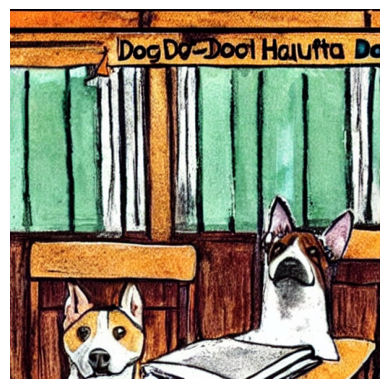

In [7]:
import torch
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import matplotlib.pyplot as plt

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the tokenizer and text model
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
text_model = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14")

# Load the stable diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16).to(device)

# Set the scheduler
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

# Function to generate and save image
def generate_image(prompt, save_path):
    # Generate image
    with torch.no_grad():
        images = pipe(prompt, guidance_scale=7.5).images

    # Save the image
    images[0].save(save_path)
    print(f"Image saved to {save_path}")

    # Display the image
    plt.imshow(images[0])
    plt.axis("off")
    plt.show()

# Generate and save an image
generate_image("A beautiful picture of dog in exam hall", "/content/generated_image.png")
